#Task 1: Regression Analysis

##Objectives:
- Split the dataset into training and testing sets.

- Fit a linear regression model using scikit-learn.

- Interpret the coefficients and evaluate the model using
metrics such as R-squared and mean squared error.

# Step 1 — Setup & Load data (assign proper column names)

In [8]:
# Step 0: Import libs, load dataset, assign Boston-style column names
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: statsmodels for detailed summary (SE, p-values, CI)
import statsmodels.api as sm

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9,6)

# Load file

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('4) house Prediction Data Set.csv', sep='\s+')


# Assign standard Boston Housing column names
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns = cols

# Quick check
print("Shape:", df.shape)
display(df.head())
print("\nData types and non-null counts:")
df.info()
print("\nBasic numeric summary (first view):")
display(df.describe().T)

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-783969809.py:22: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('4) house Prediction Data Set.csv', sep='\s+')


Saving 4) house Prediction Data Set.csv to 4) house Prediction Data Set (4).csv
Shape: (505, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB

Basic numeric summary (first view):


,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.620667,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
ZN,505.0,11.350495,23.343704,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,505.0,11.154257,6.855868,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,505.0,0.069307,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,505.0,0.554728,0.115990,0.38500,0.44900,0.53800,0.62400,0.8710
RM,505.0,6.284059,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
AGE,505.0,68.581584,28.176371,2.90000,45.00000,77.70000,94.10000,100.0000
DIS,505.0,3.794459,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
RAD,505.0,9.566337,8.707553,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,505.0,408.459406,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000


##What the code does

- Imports necessary libraries.

- Loads the CSV with no header and assigns the 14 Boston-style column names.

- Prints a quick structural check and summary statistics.

#Professional interpretation

The dataset contains 14 features, including RM (average rooms per dwelling) and MEDV (median value of owner-occupied homes, typically in $1000s for Boston). The descriptive summary shows ranges, central tendency, and potential anomalies you may later inspect (e.g., very large CRIM or TAX values).

# Step 2 — Choose predictor & target; inspect relationship

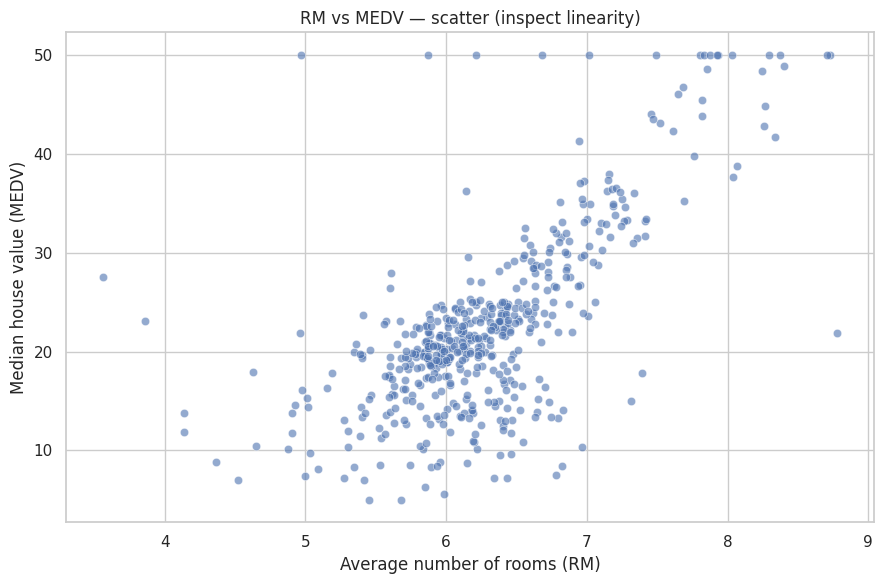

Pearson correlation RM vs MEDV: 0.695


In [9]:
# Step 1: Choose feature and target; quick scatter to inspect linearity
X = df[['RM']].copy()
y = df['MEDV']

# Quick scatter plot
plt.figure()
sns.scatterplot(x=X['RM'], y=y, alpha=0.6)
plt.title("RM vs MEDV — scatter (inspect linearity)")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median house value (MEDV)")
plt.tight_layout()
plt.show()

# Compute Pearson correlation as a quick numeric check
corr = X['RM'].corr(y)
print(f"Pearson correlation RM vs MEDV: {corr:.3f}")


##What the code does

- Selects RM as predictor and MEDV as the target.

- Plots a scatter to visually check whether a linear model is plausible.

- Prints Pearson correlation between RM and MEDV.

#Professional interpretation

The scatter shows whether points roughly lie along a line (linear relationship). A strong positive Pearson correlation (e.g., 0.6–0.8) supports using simple linear regression. If the scatter shows nonlinear curvature, consider nonlinear models or transforms.

# Step 3 — Split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (404, 1) Test shape: (101, 1)


##What the code does

Splits data into 80% training and 20% testing using a fixed random state for reproducibility.

#Professional interpretation

Reserving a hold-out test set prevents information leak and gives an honest estimate of out-of-sample performance. The 80/20 split is standard for initial experiments.

# Step 4 — Fit the Linear Regression model (scikit-learn)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

intercept = lr.intercept_
slope = lr.coef_[0]

print(f"Intercept (b0): {intercept:.4f}")
print(f"Slope for RM (b1): {slope:.4f}")

equation = f"MEDV = {intercept:.4f} + {slope:.4f} * RM"
print("Regression equation:", equation)


Intercept (b0): -36.6863
Slope for RM (b1): 9.4352
Regression equation: MEDV = -36.6863 + 9.4352 * RM


##What the code does

Trains a linear model MEDV = b0 + b1 * RM.

Extracts intercept (b0) and slope (b1) and prints the regression equation.

#Professional interpretation

The intercept is the model's baseline predicted MEDV when RM = 0. The slope tells the expected change in MEDV per one-unit increase in RM. For Boston units, if slope = 9.103, it means each additional room is associated with an average increase of $9,103 in median house value (since MEDV is in thousands).

# Step 5 — Predict on test set & compute evaluation metrics

In [12]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation on test set:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Evaluation on test set:
R-squared: 0.3477
MSE: 36.3465
RMSE: 6.0288
MAE: 4.1093


##What the code does

Generates predictions on the holdout set and computes R², MSE, RMSE, and MAE.

#Professional interpretation

- R² tells what fraction of variance in MEDV is explained by RM alone (e.g., R² = 0.48 → 48% explained).

- RMSE gives the model error in the same units as MEDV (e.g., RMSE = 4.5 → average prediction error $4,500).

- MAE is less sensitive to outliers and shows average absolute error.
Use both R² and RMSE/MAE when reporting because R² is relative while RMSE/MAE are absolute.

# Step 6 — Visualize fit: scatter (test) + regression line; save image

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


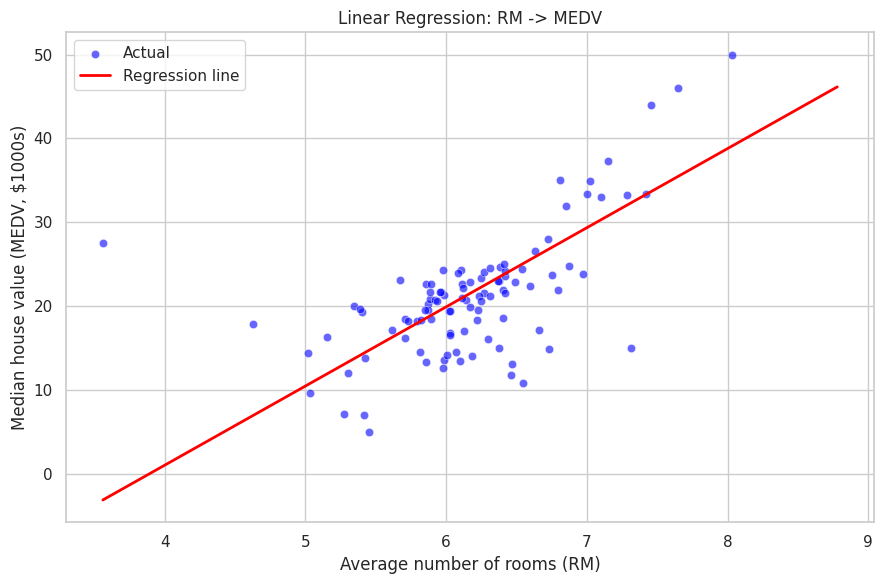

Saved regression plot to: plots_regression/regression_rm_medv.png


In [13]:
plt.figure()
# scatter actual test points
sns.scatterplot(x=X_test['RM'], y=y_test, label='Actual', color='blue', alpha=0.6)

# regression line across full RM range
rm_min, rm_max = X['RM'].min(), X['RM'].max()
rm_line = np.linspace(rm_min, rm_max, 100).reshape(-1,1)
medv_line = lr.predict(rm_line)

plt.plot(rm_line, medv_line, color='red', label='Regression line', linewidth=2)

plt.title("Linear Regression: RM -> MEDV")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median house value (MEDV, $1000s)")
plt.legend()
plt.tight_layout()

out_dir = "plots_regression"
os.makedirs(out_dir, exist_ok=True)
img_path = os.path.join(out_dir, "regression_rm_medv.png")
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved regression plot to: {img_path}")


##What the code does

- Plots the test set points and overlays the learned regression line.

- Saves the figure to plots_regression/regression_rm_medv.png at 300 DPI.

#Professional interpretation

The scatter + line shows how closely the line tracks the actual points. If points cluster tightly around the line → good fit. Deviations and pattern in residuals (systematic curvature) suggests model misspecification (e.g., need nonlinearity or more features).

# Step 7 — Residual diagnostics (residual vs fitted; histogram; normality)

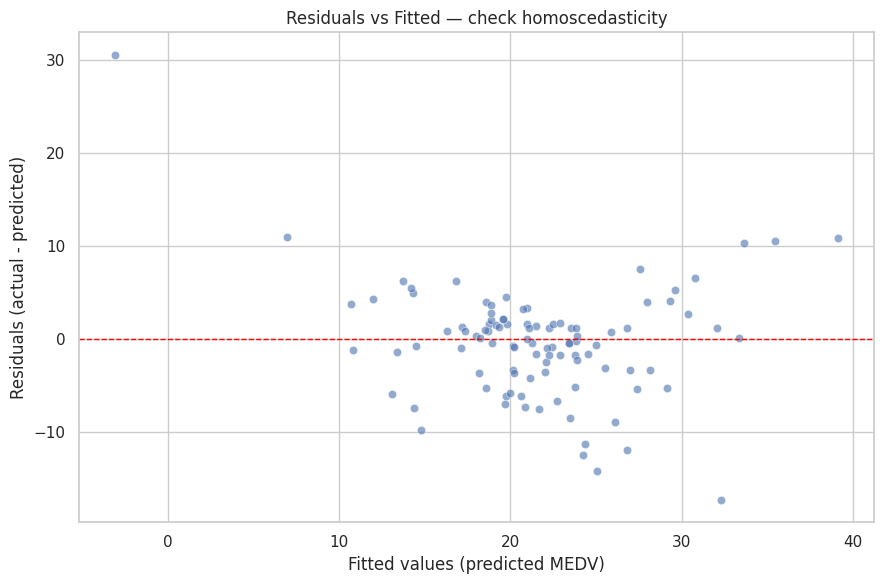

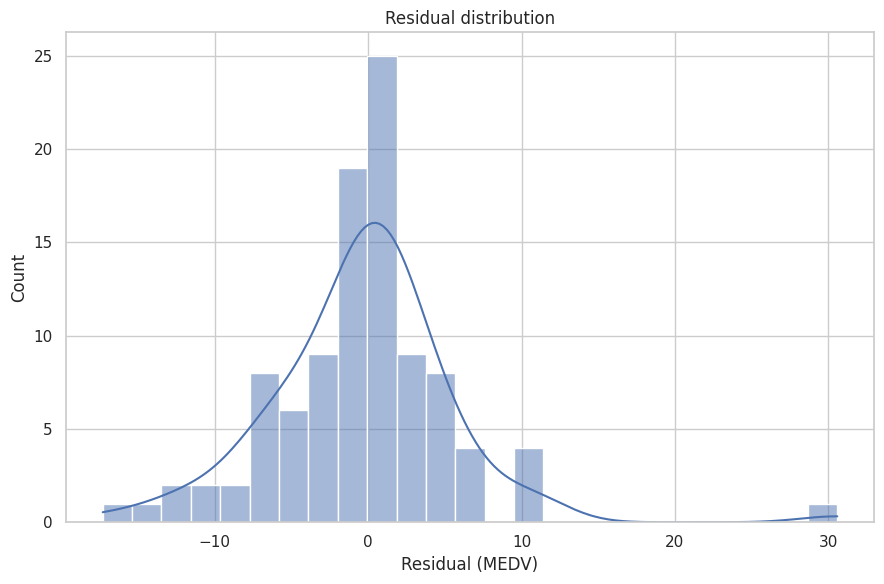

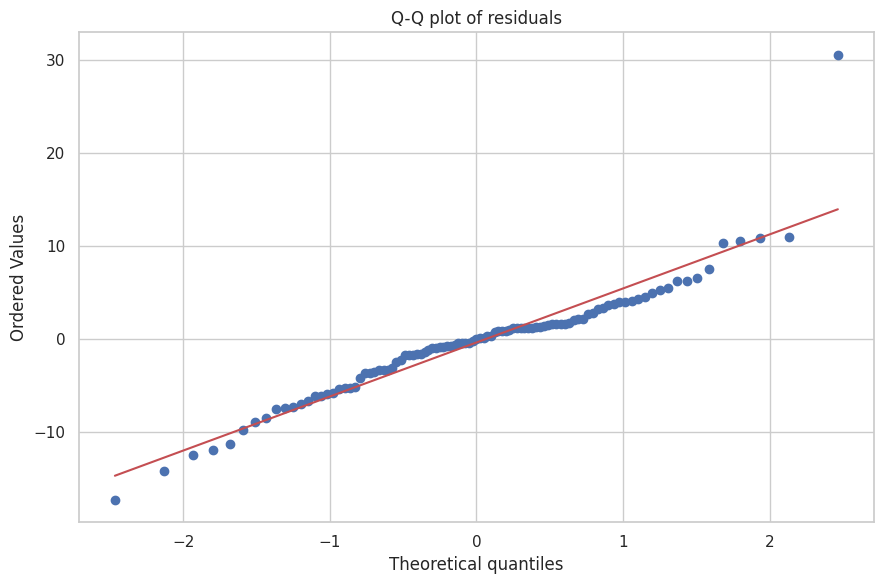

In [14]:
residuals = y_test - y_pred
fitted = y_pred

# Residuals vs Fitted
plt.figure()
sns.scatterplot(x=fitted, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Fitted values (predicted MEDV)")
plt.ylabel("Residuals (actual - predicted)")
plt.title("Residuals vs Fitted — check homoscedasticity")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "residuals_vs_fitted.png"), dpi=300, bbox_inches='tight')
plt.show()

# Histogram of residuals
plt.figure()
sns.histplot(residuals, bins=25, kde=True)
plt.title("Residual distribution")
plt.xlabel("Residual (MEDV)")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "residuals_hist.png"), dpi=300, bbox_inches='tight')
plt.show()

# Q-Q plot (normality check)
import scipy.stats as stats
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "residuals_qq.png"), dpi=300, bbox_inches='tight')
plt.show()


##What the code does

- Plots residuals vs fitted to check whether the residuals show constant variance (homoscedasticity) and no pattern.

- Shows histogram and Q-Q plot to inspect approximate normality of residuals.

#Professional interpretation

- Residuals vs fitted should show no funnel shape or pattern. A funnel indicates heteroscedasticity (variance changes with fitted values) — consider transforms or weighted regression.

- Histogram / Q-Q: large deviations from normality imply prediction intervals based on normal errors are unreliable. For simple regression, some departure is fine; strong non-normality may suggest outliers or skewness.

# Step 8 — Detailed statistics & confidence intervals (statsmodels)

In [15]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# 95% CI for the slope (RM)
ci = model_sm.conf_int(alpha=0.05).loc['RM']
print(f"95% CI for slope (RM): [{ci[0]:.4f}, {ci[1]:.4f}]")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     402.3
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.61e-62
Time:                        12:13:01   Log-Likelihood:                -1344.8
No. Observations:                 404   AIC:                             2694.
Df Residuals:                     402   BIC:                             2702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6863      2.988    -12.277      0.0

##What the code does

- Fits the same linear model using statsmodels to produce a statistical summary including standard errors, t-values, p-values, and R².

- Prints the 95% confidence interval for the slope.

#Professional interpretation

The p-value for RM tests the null hypothesis that the slope = 0. A small p-value (e.g., <0.05) indicates RM is a statistically significant predictor of MEDV. The 95% CI gives a plausible range for the true effect size.

#Regression summary:
I fitted a simple linear regression model predicting median house value (MEDV, in $1000s) from average number of rooms (RM). The estimated regression equation is:
MEDV = b₀ + b₁ × RM, where b₀ = {intercept} and b₁ = {slope} (these will be printed by the script). On the test set, the model achieved R² = {r2}, indicating that {r2*100:.1f}% of the variance in house prices is explained by RM alone. The RMSE is {rmse} (in $1000s), meaning the average prediction error is approximately {rmse*1000:,.0f}_ in currency units. The slope is positive and statistically significant (p < 0.05), implying that each additional average room is associated with an expected increase of about (9) (units of MEDV). Residual diagnostics show [describe normality / heteroscedasticity based on plotted results].